### Download data

In [1]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-10-10 09:16:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  8.67MB/s    in 22s     

2019-10-10 09:16:26 (8.80 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-10-10 09:16:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/

### Unzip data

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

### Take a look at data

In [3]:
rock_data     = os.path.join('/tmp/rps/rock')
paper_data    = os.path.join('/tmp/rps/paper')
scissors_data = os.path.join('/tmp/rps/scissors')

print(f'Lenght of rock data: {len(os.listdir(rock_data))}')
print(f'Lenght of paper data: {len(os.listdir(paper_data))}')
print(f'Lenght of scissors data: {len(os.listdir(scissors_data))}')

rock_files = os.listdir(rock_data)
print(rock_files[:10])

paper_files = os.listdir(paper_data)
print(paper_files[:10])

scissors_files = os.listdir(scissors_data)
print(scissors_files[:10])

Lenght of rock data: 840
Lenght of paper data: 840
Lenght of scissors data: 840
['rock07-k03-009.png', 'rock02-059.png', 'rock03-063.png', 'rock07-k03-112.png', 'rock02-053.png', 'rock05ck01-064.png', 'rock07-k03-052.png', 'rock05ck01-067.png', 'rock01-036.png', 'rock04-057.png']
['paper05-108.png', 'paper05-062.png', 'paper05-028.png', 'paper05-046.png', 'paper04-061.png', 'paper07-048.png', 'paper07-087.png', 'paper03-105.png', 'paper02-049.png', 'paper04-066.png']
['testscissors03-006.png', 'testscissors03-060.png', 'testscissors01-045.png', 'scissors03-107.png', 'scissors03-052.png', 'scissors03-008.png', 'testscissors03-018.png', 'testscissors03-063.png', 'scissors04-102.png', 'testscissors03-017.png']


### Plot some images

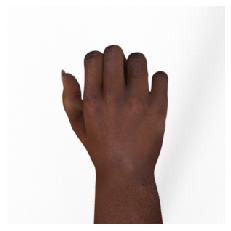

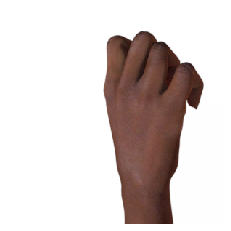

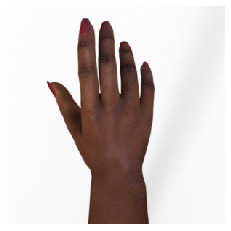

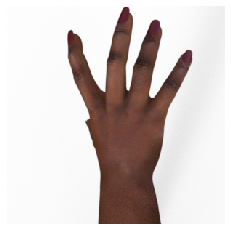

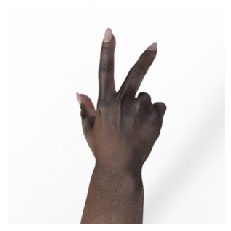

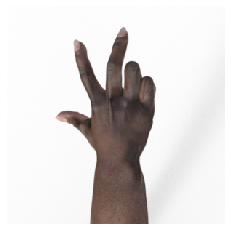

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

next_rock = [os.path.join(rock_data, fname) 
                for fname in rock_files[:2]]
next_paper = [os.path.join(paper_data, fname) 
                for fname in paper_files[:2]]
next_scissors = [os.path.join(scissors_data, fname) 
                for fname in scissors_files[:2]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Create CNN-v2d - DNN model

In [5]:
import tensorflow as tf
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

/home/martin/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/martin/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/martin/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/martin/anaconda3/envs/tf/lib/python3.6/site-packages

#### Prepare data generator for training and validation

In [6]:
batch_size = 50
#for training data
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 40,
    width_shift_range  = 0.2,
    height_shift_range = 0.2,
    shear_range        = 0.2,
    zoom_range         = 0.2,
    horizontal_flip    = True,
    fill_mode          = "nearest"
)

#for validation data
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_dategen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode  = 'categorical'
)

validation_generator = validation_dategen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode  = 'categorical'
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### Build model

In [16]:
model = tf.keras.models.Sequential([
    #first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten and dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #put in into DNN
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")   
])

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit_generator(train_generator,steps_per_epoch=79, epochs=25, validation_steps=5, validation_data = validation_generator, verbose = 1)
model.save('rms.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 128)       147584    
__________

### Let's plot some graph

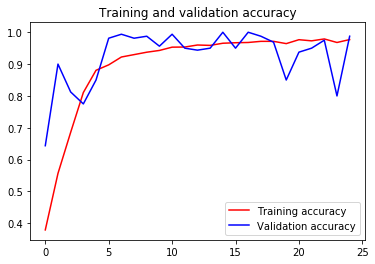

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### Test some images

In [31]:
rock_test_data = os.path.join("/tmp/rps-test-set/rock/")
paper_test_data = os.path.join("/tmp/rps-test-set/paper/")
scissors_test_data = os.path.join("/tmp/rps-test-set/scissors/")

In [34]:
rock_test_file = os.listdir(rock_test_data)
paper_test_file = os.listdir(paper_test_data)
scissors_test_file = os.listdir(scissors_test_data)

In [41]:
rock_test_next = [os.path.join(rock_test_data, fname)
                     for fname in rock_test_file[:5]]

paper_test_next = [os.path.join(paper_test_data, fname)
                     for fname in paper_test_file[:5]]

scissors_test_next = [os.path.join(scissors_test_data, fname)
                     for fname in scissors_test_file[:5]]

rock = [0 1 0] ----- scissors = [0 0 1] ----- paper = [1 0 0]

[[0. 1. 0.]]


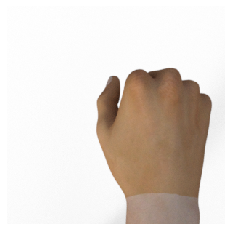

[[0. 1. 0.]]


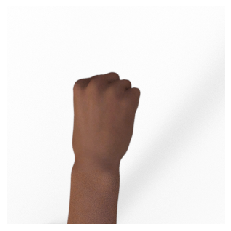

[[0. 1. 0.]]


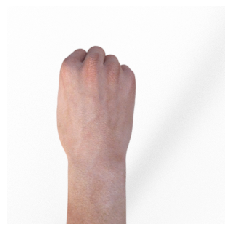

[[0. 1. 0.]]


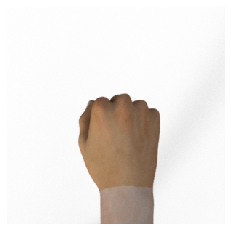

[[0. 1. 0.]]


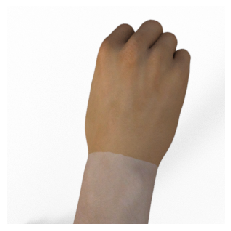

[[1. 0. 0.]]


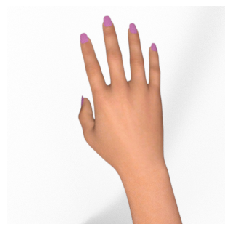

[[1. 0. 0.]]


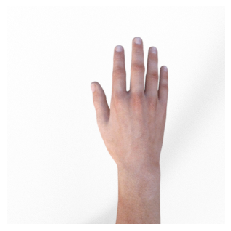

[[1. 0. 0.]]


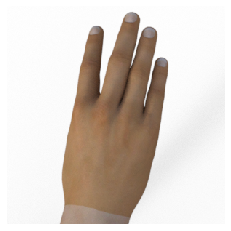

[[1. 0. 0.]]


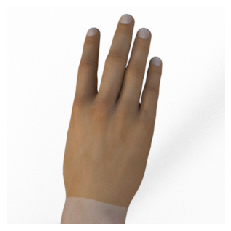

[[1. 0. 0.]]


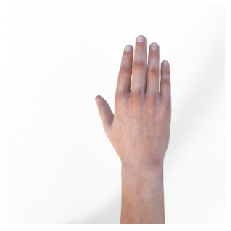

[[0. 0. 1.]]


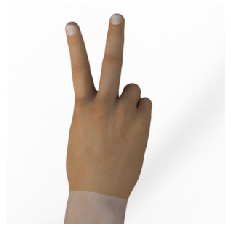

[[0. 0. 1.]]


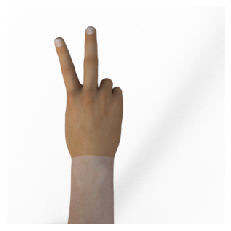

[[0. 0. 1.]]


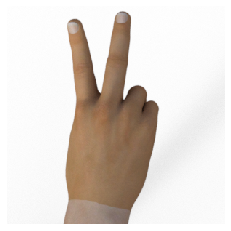

[[0. 0. 1.]]


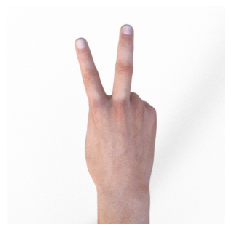

[[0. 0. 1.]]


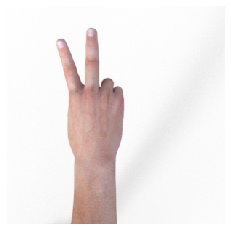

In [49]:
for i, img_path in enumerate(rock_test_next + paper_test_next + scissors_test_next):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  img = image.load_img(img_path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  plt.show()